In [1]:
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt

In [2]:
numentries = 10000

# create empirical probability densities from Monte-Carlo simulation
# typically the underlying PDF is much to complicated to express in form as it is here
var_sample1 = np.random.normal(loc=6, scale=1, size=numentries)
weight1 = 0.3
var_sample2 = np.random.exponential(scale=3, size=numentries)
weight2 = 1
var_sample3 = np.random.exponential(scale=1, size=numentries)
weight3 = 0.1

bin_edges = np.linspace(0., 15., 16)

pdf_sample1 = np.histogram(var_sample1, bins=bin_edges)[0]*weight1
pdf_sample2 = np.histogram(var_sample2, bins=bin_edges)[0]*weight2
pdf_sample3 = np.histogram(var_sample3, bins=bin_edges)[0]*weight3

sum_pdf = pdf_sample1 + pdf_sample2 + pdf_sample3

In [3]:
# create pseudodata
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
observed_pdf = np.random.poisson(sum_pdf)

<IPython.core.display.Javascript object>


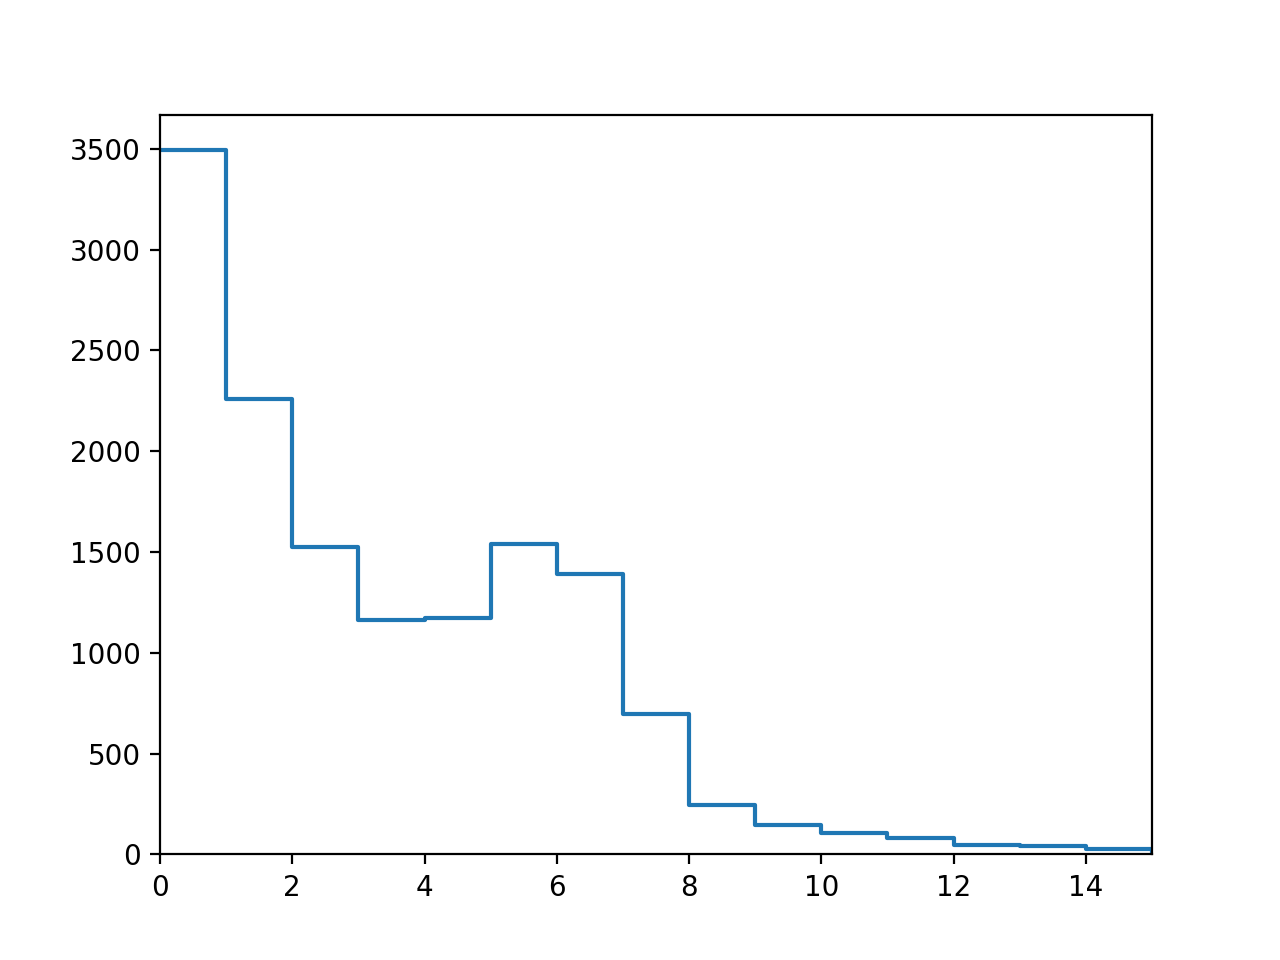

(0, 3666.075)

In [4]:
# step plot
fig, ax = plt.subplots()
ax.step(bin_edges, np.r_[sum_pdf, 0], where='post')
ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)

<IPython.core.display.Javascript object>


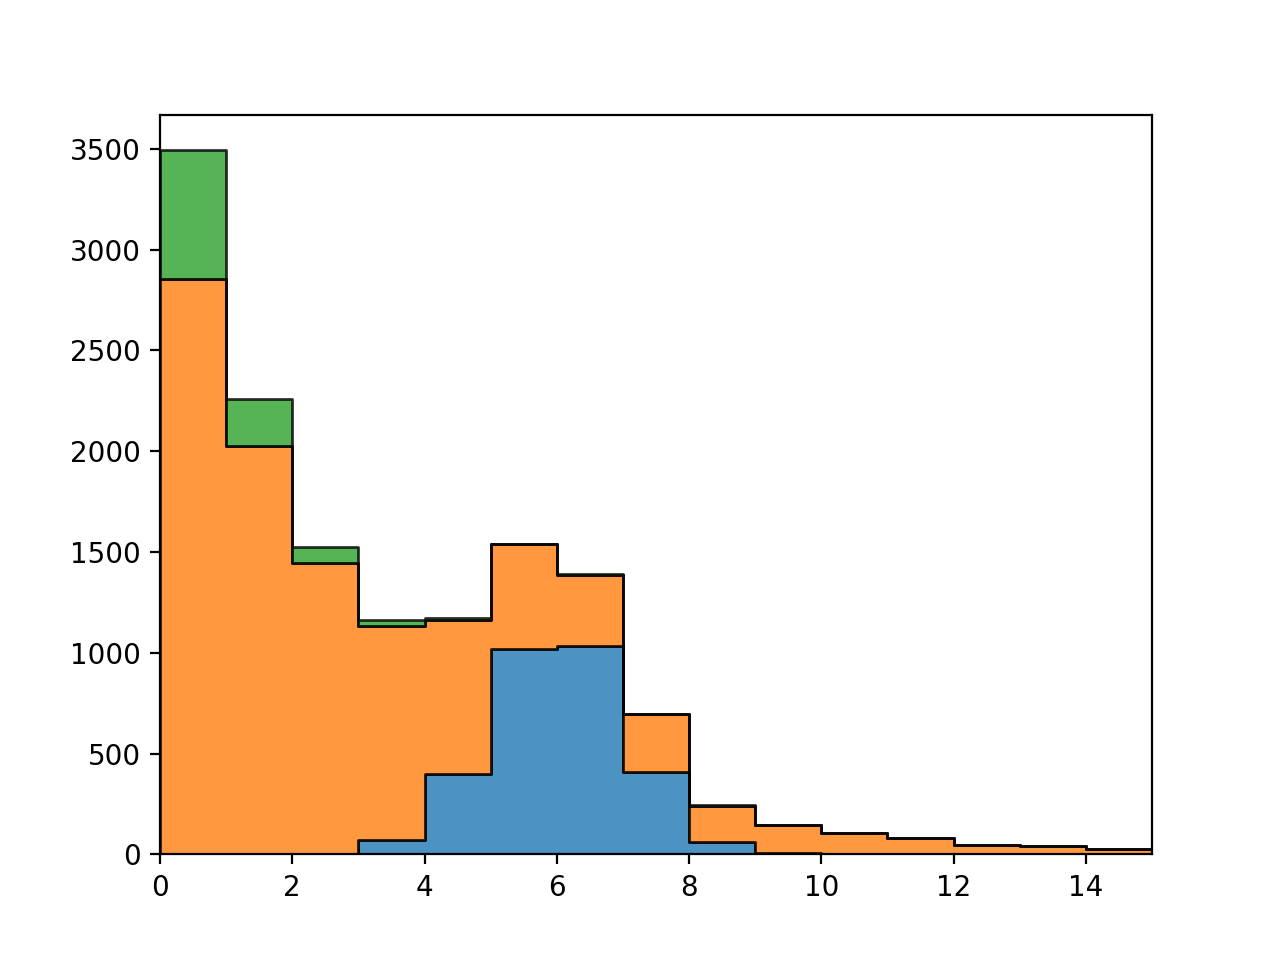

(0, 3666.075)

In [5]:
# stack plot
fig, ax = plt.subplots()

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}

cumulative = np.zeros_like(pdf_sample1)
for source in [pdf_sample1, pdf_sample2, pdf_sample3]:
    ax.fill_between(bin_edges, np.r_[cumulative, 0], np.r_[cumulative+source, 0], step='post', **fill_opts)
    cumulative += source

ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)